# importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../Data/titanic_tested.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# EDA

In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [60]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
data['Survived'].unique()

array([0, 1], dtype=int64)

# Transformation

In [ ]:
data['last_name']=data['Name'].str.split(',').str[0]
data['first_name']=data['Name'].str.split('.').str[-1].strip()
data['title']=data['Name'].str.split('.').str[0].str.split().str[-1].strip()

# data Visualisation

## Bar Plots

<Axes: xlabel='Survived'>

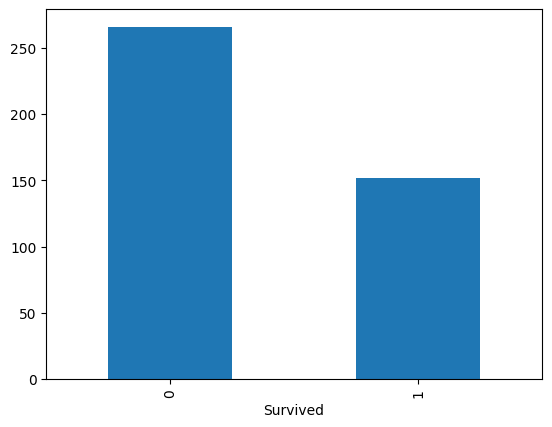

In [8]:
data['Survived'].value_counts().plot(kind='bar')

<Axes: xlabel='Pclass'>

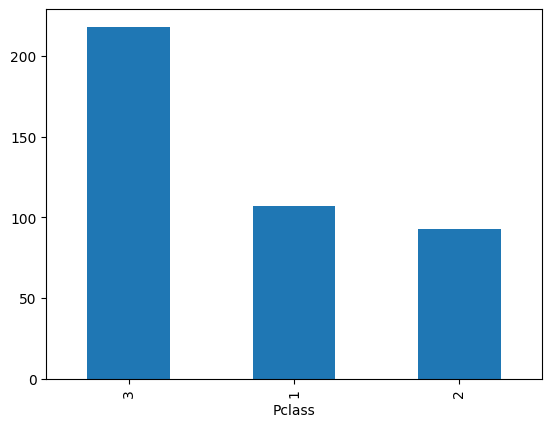

In [79]:
data['Pclass'].value_counts().plot(kind='bar')

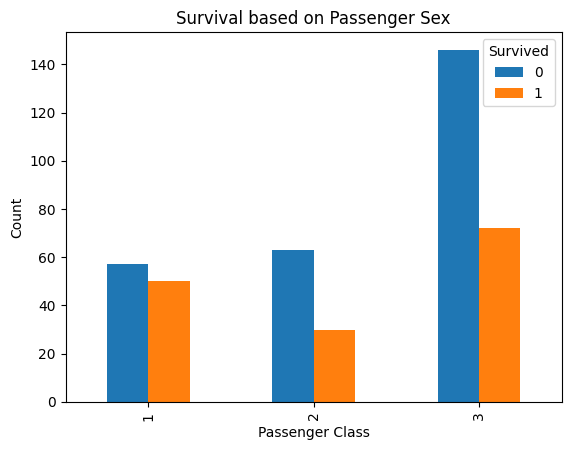

In [75]:
data.groupby(['Pclass', 'Survived']).size().unstack().plot(kind='bar', stacked=False)
plt.title('Survival based on Passenger Sex')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

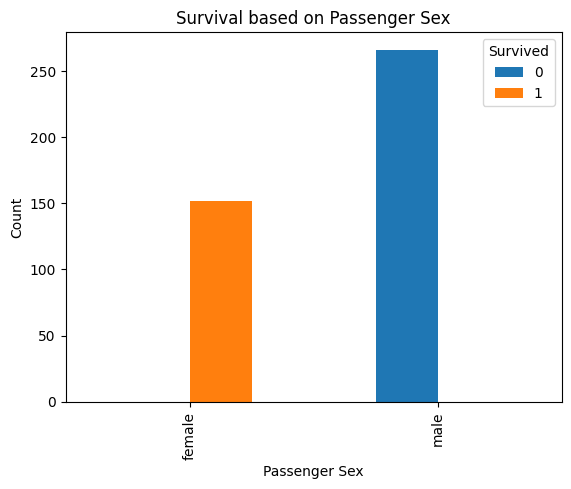

In [77]:
sex_survived = data.groupby(['Sex', 'Survived']).size().unstack()
sex_survived.plot(kind='bar', stacked=False)
plt.title('Survival based on Passenger Sex')
plt.xlabel('Passenger Sex')
plt.ylabel('Count')
plt.show()

In [88]:
data[data['Sex']=='male']['Survived'].unique()

array([0], dtype=int64)

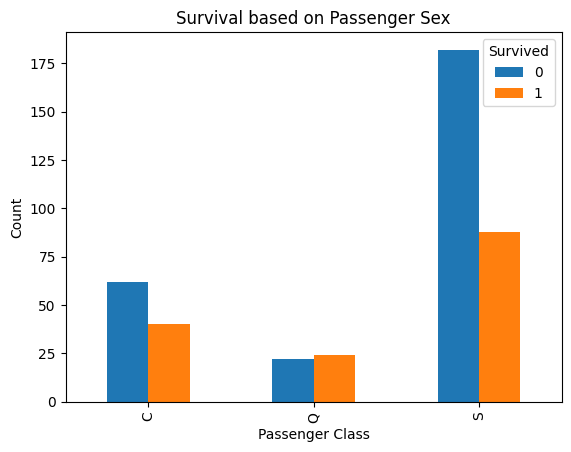

In [78]:
data.groupby(['Embarked', 'Survived']).size().unstack().plot(kind='bar', stacked=False)
plt.title('Survival based on Passenger Sex')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

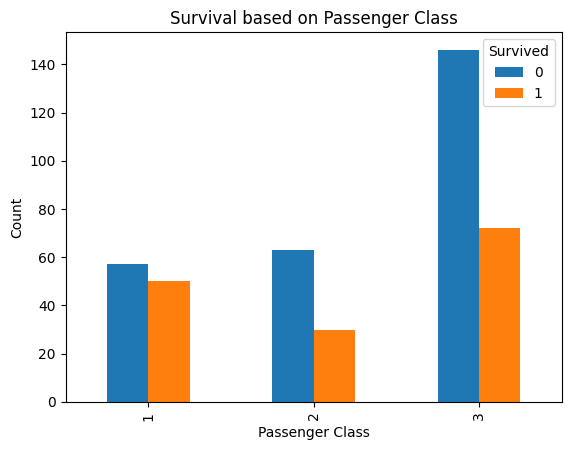

In [86]:
# Example: Survival based on Passenger Class
class_survived = data.groupby(['Pclass', 'Survived']).size().unstack()
class_survived.plot(kind='bar', stacked=False)
plt.title('Survival based on Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.savefig(r'C:\Users\promi\OneDrive\Documents\DataTrove\CODE April\Images\class1.png')
plt.show()


<Axes: xlabel='Pclass'>

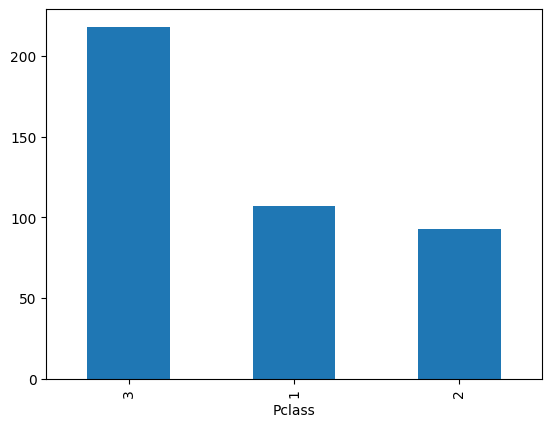

In [22]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [49]:
data[['Pclass', 'Age', 'Sex']].groupby('Sex').count()

,Pclass,Age
Sex,,
female,152,127
male,266,205


<Axes: xlabel='Pclass', ylabel='count'>

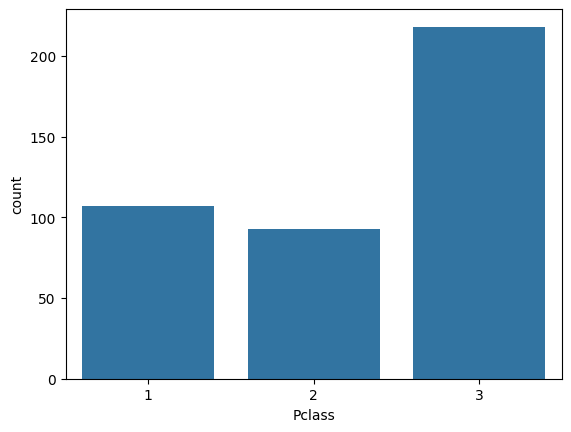

In [57]:
sns.barplot(x=data['Pclass'].value_counts().index, y=data['Pclass'].value_counts())

<Axes: xlabel='Sex'>

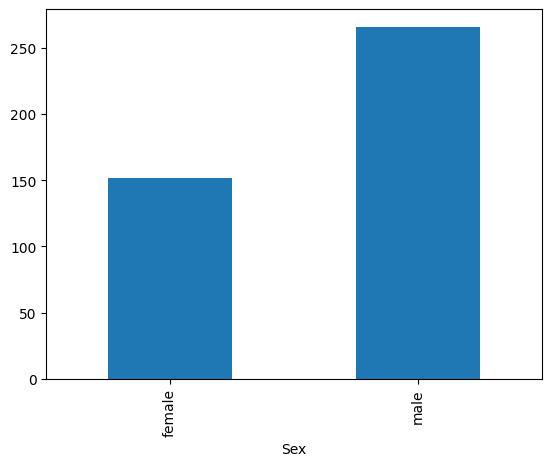

In [67]:
data[['Pclass', 'Age', 'Sex']].groupby('Sex').size().plot(x='Pclass', kind='bar', )

<Axes: xlabel='Pclass'>

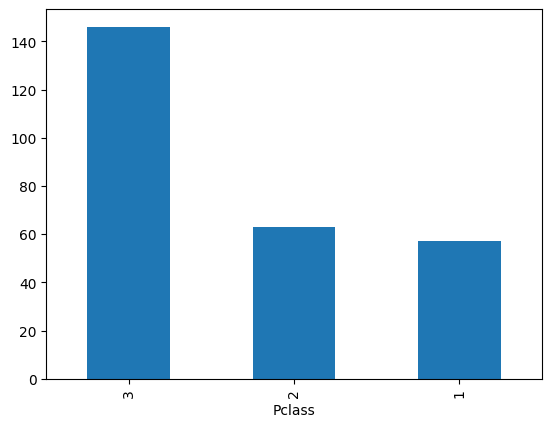

In [24]:
data[data['Sex']=='female']['Pclass'].value_counts().plot(kind='bar')
data[data['Sex']=='male']['Pclass'].value_counts().plot(kind='bar')

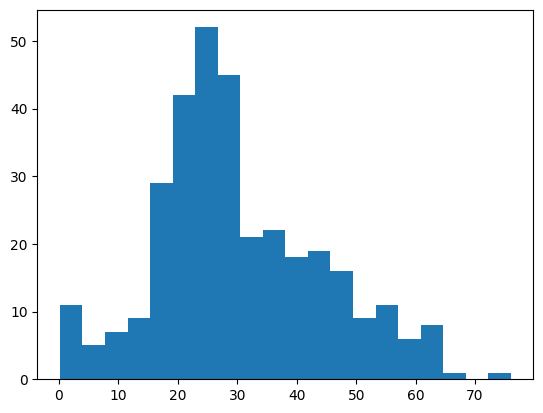

In [19]:
plt.hist(data['Age'].sort_values(ascending=True), bins=20);

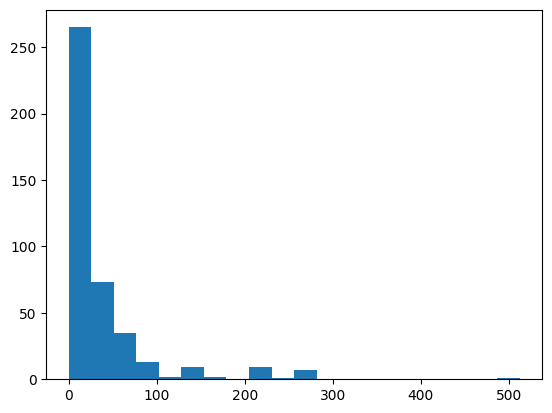

In [80]:
plt.hist(data['Fare'].sort_values(ascending=True), bins=20);

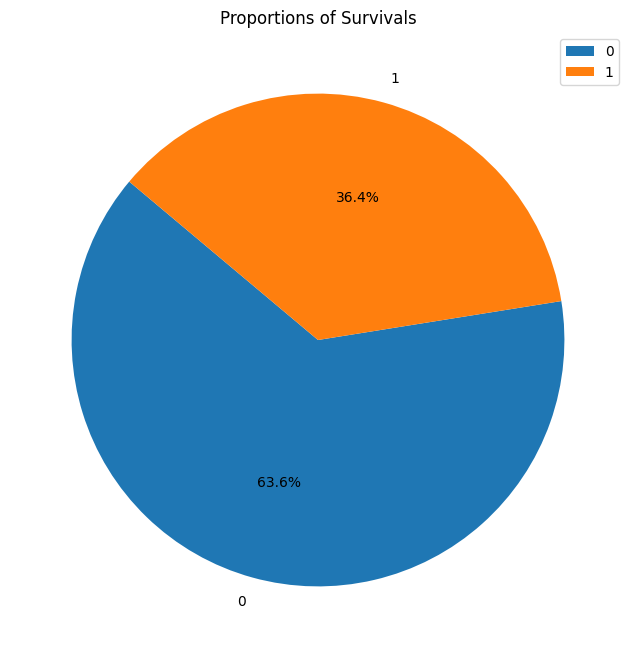

In [21]:
position_counts = data['Survived'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportions of Survivals')
plt.legend()
plt.show()

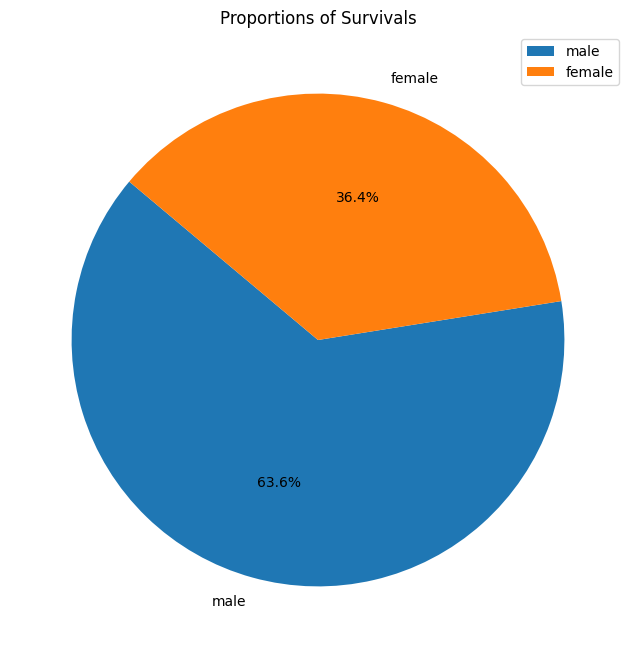

In [58]:
position_counts = data['Sex'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportions of Sex')
plt.legend()
plt.show()